In [10]:
 import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [11]:
dataframe = pd.read_csv("diabetes.csv")
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#array1 = dataframe.values
X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]

kfold = StratifiedKFold(n_splits=10,random_state=2023,shuffle=True)

model = RandomForestClassifier(n_estimators=200,random_state=20,max_depth=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print(results.mean())

[0.75324675 0.79220779 0.74025974 0.77922078 0.68831169 0.74025974
 0.77922078 0.75324675 0.77631579 0.75      ]
0.755228981544771


#### Hyper parameter tuning using GridSearchCv

In [13]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,None],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,100,200,500],
    'max_features':["sqrt","log2",None],
    'criterion':["gini","entrophy"] 
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=10, scoring="accuracy")
grid_search.fit(X, Y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\mruh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
217 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mruh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mruh\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mruh\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mruh\anaconda3\lib\site-packages\s

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [2, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=10)

In [20]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 500}
0.7787369493251847


In [21]:
grid_search.best_estimator_

RandomForestClassifier(max_features='log2', min_samples_leaf=5,
                       n_estimators=500, n_jobs=-1, random_state=42)

#### Feature Selection using Random Forest

In [23]:
model_best = RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                                   min_samples_leaf=5, n_jobs=-1, random_state=42)
model_best.fit(X,Y)
model_best.feature_importances_

array([0.04279647, 0.44093393, 0.0396377 , 0.0225074 , 0.0251669 ,
       0.21364299, 0.08380487, 0.13150974])

In [24]:
X = dataframe.iloc[:,0:8]
X.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [27]:
df = pd.DataFrame(model_best.feature_importances_, columns = ["Importance score"],index = X.columns)
df.sort_values(by = "Importance score", inplace = True, ascending = False)

<BarContainer object of 8 artists>

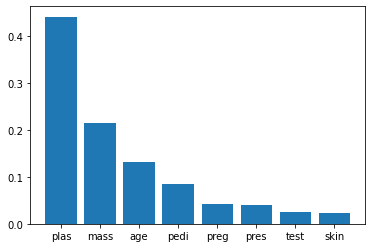

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(df.index, df["Importance score"])